CONSIDERAR DOIS TERMOS DE ACOPLAMENTO DIFERENTES!!!

# Fazer introduçao teorica

# Bandas com $T_c$ diferentes

The free energy, with an uniform $\psi_i$, no fields, and a new coupling term, is described by,
$$F=\alpha(|\psi_1|^2+|\psi_2|^2)+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+\nu(|\psi_1|^2|\psi_2|^2)$$

To find the extreme points we take the derivative of the free energy with respect to $\psi_i$,$$\frac{dF}{d\psi_i}=\alpha\psi_i^*+\beta(\psi_i^*)^2\psi_i+\nu|\psi_j|^2\psi_i^*=0 \Leftrightarrow $$
$$\Leftrightarrow \psi_i^*(\alpha+\beta|\psi_i|^2+\nu|\psi_j|^2)=0\Leftrightarrow \psi_i^*=0\vee \alpha+\beta|\psi_i|^2+\nu|\psi_j|^2=0 $$
$$\Leftrightarrow \psi_i=0 \vee |\psi_j|^2=-\frac{1}{\nu}(\alpha+\beta|\psi_i|^2)$$
with $j\neq i$.
$$\left\{\begin{array}{c} |\psi_1|^2=-\frac{1}{\beta}(\alpha+\nu|\psi_2|^2) \\ |\psi_2|^2=-\frac{1}{\beta}(\alpha+\nu|\psi_1|^2)\end{array}\right. \Leftrightarrow |\psi_1|^2=|\psi_2|^2=\frac{-\alpha}{\nu+\beta}$$

## Plot $\psi$

In [353]:
clear all;

$$\alpha_0 = 1$$ $$\beta = 0.5$$ $$\nu = 10$$ $$T_{crítica} = 1000K$$

$$\alpha(T) = \alpha_0 (T-T_{crítica})$$

$$\psi(T) = \pm \sqrt{\frac{-\alpha(T)}{(\nu+\beta)}}$$

In [354]:
a0=0.1; beta=0.5; v=10; Tc=1000;
alpha = @(T) a0*(T-Tc);
psi = @(T) sqrt(-alpha(T)/(v+beta));

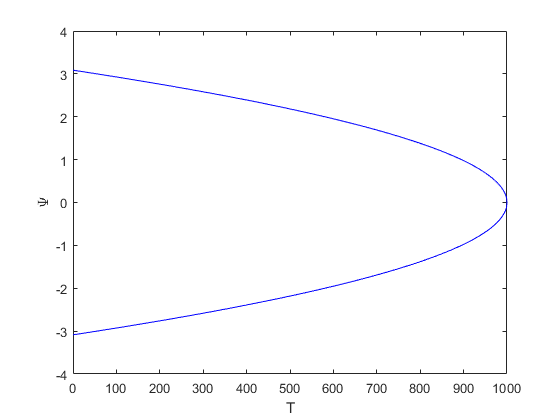

In [355]:
T = 0:Tc;
plot(T,psi(T),'b')
hold on
plot(T,-psi(T),'b')
xlabel('T')
ylabel('\Psi')

## Plot $F$ for specific temperatures

Assume uniform $\psi$

In [356]:
psi = psi(0:Tc);

Define $F$ functions

$$|\psi_1|^2 = |\psi_2|^2 \Leftrightarrow F(T) = F_n + \alpha(T) |\psi|^2 + \frac{\beta}{2} |\psi|^4$$

$$F_c = F(T_1) = F(T_c)$$ 

$$F_- = F(T_2) = F(T_c - 200K)$$ 

$$F_+ = F(T_3) = F(T_c + 200K) $$

In [1]:
T = Tc;
Fc = 2*alpha(T).*(psi.^2) + (beta+v) * (psi.^4);

T = Tc + 200;
Fplus = 2*alpha(T).*(psi.^2) + (beta+v) * (psi.^4);

T = Tc - 200;
Fminus = 2*alpha(T).*(psi.^2) + (beta+v) * (psi.^4);

T = 490;
Fminus2 = 2*alpha(T).*(psi.^2) + (beta+v) * (psi.^4);

Unrecognized function or variable 'Tc'.



Error: -1

## Find $F(\psi)$ minimums (only $\psi$ != 0 for T < Tc)

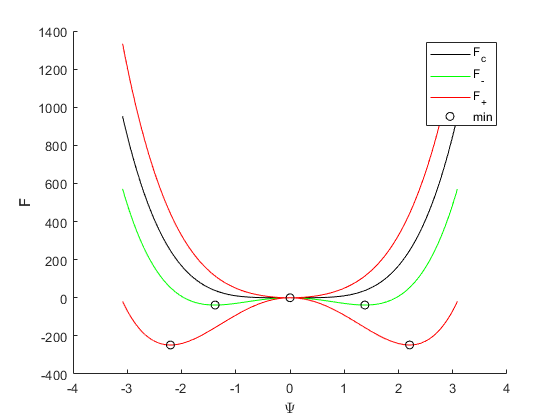

In [358]:
hold on

p1 = plot(psi,Fc,'k');
p1 = plot(-psi,Fc,'k');

%Find minimum
[val,indx] = max(-Fc);
p4 = plot(psi(indx),-val,'ko');
p4 = plot(-psi(indx),-val,'ko');

p2 = plot(psi,Fminus,'g');
p2 = plot(-psi,Fminus,'g');

%Find minimum
[val,indx] = max(-Fminus);
p4 = plot(psi(indx),-val,'ko');
p4 = plot(-psi(indx),-val,'ko');

p3 = plot(psi,Fplus,'r');
p3 = plot(-psi,Fplus,'r');


plot(psi,Fminus2,'r');
plot(-psi,Fminus2,'r');




%Find minimum
[val,indx] = max(-Fplus);
p4 = plot(psi(indx),-val,'ko');
p4 = plot(-psi(indx),-val,'ko');

[val,indx] = max(-Fminus2);
p4 = plot(psi(indx),-val,'ko');
p4 = plot(-psi(indx),-val,'ko');


xlabel('\Psi')
ylabel('F')

legend([p1,p2,p3,p4],'F_c','F_-','F_+','min')

Plot $F$ minimums for $T < Tc$

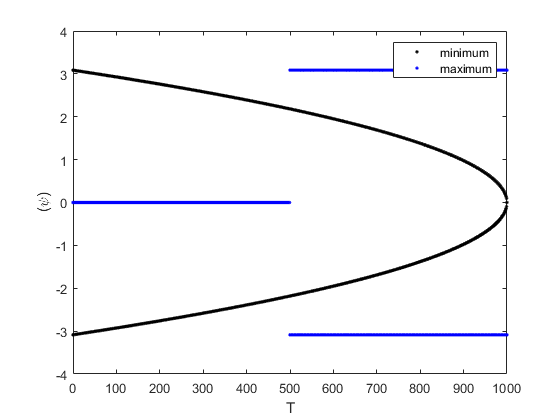

In [359]:
F = @(T) 2*alpha(T).*(psi.^2) + (beta+v) * (psi.^4);

T = 0:Tc;
minimums = zeros(length(T)*2,2);
maximums = zeros(length(T)*2,2);
i = 0;
for t = T
    i=i+1;
    %MINIMUMS
    [val,indx] = max(-F(t));
    minimums(i,1) = t;
    minimums(i+length(T),1) = t;
    minimums(i,2) = psi(indx);
    minimums(i+length(T),2) = -psi(indx);
    %MAXIMUMS
    [val,indx] = max(F(t));
    val = psi(indx);
    maximums(i,1) = t;
    maximums(i+length(T),1) = t;
    maximums(i,2) = val;
    maximums(i+length(T),2) = -val;
end

plot(minimums(:,1),minimums(:,2),'k.')
hold on
plot(maximums(:,1),maximums(:,2),'b.')

xlabel('T')
ylabel('(\psi)')

legend('minimum','maximum')

## Assuming another term of $|\psi_2| \Rightarrow F = F_{old} + \frac{\gamma}{3} |\psi_2|^6$.

$$F=\alpha_1\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+ \frac{\gamma}{3}|\psi_2|^6+\nu(|\psi_1|^2|\psi_2|^2)=$$

To find the extreme points we take the derivative of the free energy with respect to {$|\psi_1|,|\psi_2|$},
$$\frac{dF}{d|\psi_1|}=2\alpha_1|\psi_1|+2\beta|\psi_1|^3+2\nu|\psi_1||\psi_2|^2=0$$
$$\frac{dF}{d|\psi_2|}=2\alpha_2|\psi_2|+2\beta|\psi_2|^3+2\gamma|\psi_2|^5+2\nu|\psi_1|^2|\psi_2|=0$$

Solving $\psi_1$:

$$\alpha_1|\psi_1|+\beta|\psi_1|^3+\nu|\psi_1||\psi_2|^2=0 
\Leftrightarrow
|\psi_1|(\alpha_1+\beta|\psi_1|^2+\nu|\psi_2|^2)=0$$
$$|\psi_1|=0 \vee |\psi_2|^2 = -\frac{1}{\nu}(\alpha_1+\beta|\psi_1|^2)$$

Solving $\psi_2$:

$$\alpha_2|\psi_2|+\beta|\psi_2|^3+\nu|\psi_1|^2|\psi_2|+\gamma|\psi_2|^5=0 
\Leftrightarrow
|\psi_2|(\alpha_2+\beta|\psi_2|^2+\gamma|\psi_2|^4+\nu|\psi_1|^2)=0$$
$$|\psi_2|=0 \vee |\psi_2|^2 = \frac{-\beta\pm\sqrt{\beta^2-4\gamma(\alpha_2+\nu|\psi_1|^2)}}{2\gamma}$$

Therefore

$$-\frac{1}{\nu}(\alpha_1+\beta|\psi_1|^2)=\frac{-\beta\pm\sqrt{\beta^2-4\gamma(\alpha+\nu|\psi_1|^2)}}{2\gamma}$$

$$(2\gamma\alpha_1\beta-\nu\beta^2+\nu^3)|\psi_1|^2 +
(\gamma\beta^2)|\psi_1|^4+(\gamma\alpha_1^2\nu + \alpha_2 \nu^2 - \beta \alpha_1 \nu) = 0$$

$|\psi_1|$ can be expressed as:

$$A = \gamma\beta^2$$
$$B = 2\gamma\alpha_1\beta-\nu\beta^2+\nu^3$$
$$C = \gamma\alpha_1^2\nu + \alpha_2 \nu^2 - \beta \alpha_1 \nu$$
$$|\psi_1|^2 = \frac{-B \pm \sqrt{B^2-4AC}}{2A}$$

$$\alpha_0 = 0.1$$ $$\beta = -10$$ $$\gamma = 1$$ $$\nu = 10$$ $$T_{crítica}^1 = 1000K$$ $$T_{crítica}^2 = 10K$$ $$\gamma = 0.01$$

$$\alpha(T) = \alpha_0 (T-T_{crítica})$$

## obtido de forma diferente a través de simplifacação no wolfram das derivadas:

$$\psi_1^2 = (-\alpha_0(T-Tc_1)-\psi_2^2\nu)\frac{1}{\beta}$$

$$\psi_2^2 = (\nu^2 - \beta(\beta \pm \sqrt{\beta^4 + 4\alpha_1(T)\beta\gamma\nu + \nu^4-2\beta^2(2\alpha_2\gamma+\nu^2)\frac{1}{\beta^2}})\frac{1}{2\beta\gamma}$$

In [370]:
clear all

In [371]:
alpha0 = 105;
beta = 0.1;
gama = 0.1;
v = 0.1;
Tc1 = 30;
Tc2= 10;  
alpha1 = @(T) alpha0 * (T-Tc1);
alpha2 = @(T) alpha0 * (T-Tc2);

In [381]:
Ts = 0:0.1:max([Tc1,Tc2]);
A = gama * beta^2;
B = @(T) 2*gama * alpha1(T)*beta - v*beta^2 + v^3;
C = @(T) gama*alpha1(T).^2*v + alpha2(T).*v^2 - beta*alpha1(T).*v;
%%------------------------Obtido manualmente
%%%Psi 1%%%% 
%Psi_1_plus = @(T) sqrt((-B(T) + sqrt(B(T).^2-4*A.*C(T)))./(2*A));
Psi_1_minus = @(T) sqrt((-B(T) - sqrt(B(T).^2-4*A.*C(T)))./(2*A));

%%%Psi 2%%%%
%Psi_2_plus = @(T) sqrt((-1/v) * (alpha1(T)+beta*Psi_1_plus(T).^2));
Psi_2_minus = @(T) sqrt((-1/v) * (alpha1(T)+beta*Psi_1_minus(T).^2));

%%------------------------Obtido pelo wolfram
%Psi_2_squareRoot = @(T) (beta^4+4*alpha1(T)*beta*gama*v+v^4-2*beta^2*(2*alpha2(T)*gama+v^2))/beta^2;

%Psi_2_plus_squared = @(T) (v^2 - beta*(beta + sqrt(Psi_2_squareRoot(T))))/2*beta*gama;
%Psi_2_minus_squared = @(T) (v^2 - beta*(beta - sqrt(Psi_2_squareRoot(T))))/2*beta*gama;

%Psi_1_plus_squared = @(T) (-alpha1(T) + v * Psi_2_plus_squared(T)) / beta; 
%Psi_1_minus_squared = @(T) (-alpha1(T) + v * Psi_2_minus_squared(T)) / beta;


Encontrar $\psi_i$ sem termo de acoplamento

In [382]:
%----------------------- Sem termo de acoplamento
%%%Psi 1%%%%
Psi_1_norm = @(T) (T<Tc1).*sqrt(-alpha1(T)/beta);

%%%Psi 2%%%%
Psi_2_norm = @(T) (T<Tc2).*(-beta + sqrt(beta^2-4*gama*alpha2(T)))/(2*gama);


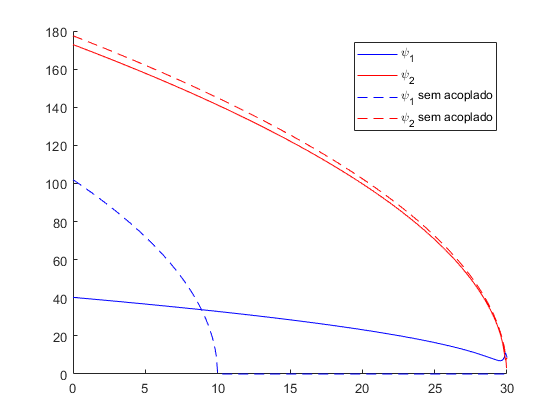

In [383]:
hold on
p1 = plot(Ts,Psi_1_minus(Ts),'b');
p2 = plot(Ts,Psi_2_minus(Ts),'r');
p3 = plot(Ts,Psi_2_norm(Ts),'b--');
p4 = plot(Ts,Psi_1_norm(Ts),'r--');
legend([p1,p2,p3,p4],{"{\psi_1}","{\psi_2}","{\psi_1} sem acoplado","{\psi_2} sem acoplado"})
axis([0,30,0,180])